# Loading and Cleaning Data

In [ ]:
# !pip install matplotlib

In [ ]:
# !pip install pandas

In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
matplotlib.__version__

'3.0.3'

In [7]:
crude_oil_data = pd.read_csv('U.S._crude_oil_production.csv')

crude_oil_data.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [15]:
print(crude_oil_data.shape)

crude_oil_data.tail(5)

(121, 36)


,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1
120,2018-06-01,10674,16,451,14,0,462,423,1658,15,...,65,526,18,4,226,30,0,94,4410,1


In [16]:
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [17]:
# (crude_oil_data.sum(axis=0)) == 0

crude_oil_data.columns[(crude_oil_data.sum(axis=0)) ==0]

Index(['Arizona', 'Virginia'], dtype='object')

In [21]:
crude_oil_data.drop(['Arizona','Virginia'],inplace=True,axis=1)
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [22]:
#converting to a datatime from and store it in a new column called Date 
# to allow me to extract features from the date e.g. extracting only the year

crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Month'])
crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

In [23]:
crude_oil_data.drop(['Month'],inplace=True,axis=1)
crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [24]:
# renaming some of the columns names to make it easier when making visualisations

crude_oil_data = crude_oil_data.rename(columns= {'Federal Offshore Gulf of Mexico Crude Oil':'Mexico',
                                                'Federal Offshore Pacific Crude Oil':'Pacific'})

crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Mexico', 'Pacific', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [25]:
crude_oil_data['Year'] = crude_oil_data['Date'].dt.year
crude_oil_data['Year'].sample(10)

67     2014
16     2009
51     2012
115    2018
108    2017
77     2014
29     2010
56     2013
116    2018
7      2009
Name: Year, dtype: int64

In [26]:
crude_oil_data.describe()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Year
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000
mean,7423.694215,22.958678,540.404959,16.462810,536.388430,212.115702,1444.264463,43.115702,5.190083,0.066116,...,33.322314,321.611570,13.876033,4.504132,180.429752,16.471074,85.148760,2403.826446,1.0,2012.958678
std,1801.581601,3.773585,73.691879,1.483472,33.228595,117.403165,216.197200,18.735523,1.273539,0.249517,...,22.429971,119.141958,4.497352,0.564564,34.097367,10.968952,16.662163,1025.413694,0.0,2.950697
min,3974.000000,16.000000,398.000000,14.000000,461.000000,81.000000,242.000000,13.000000,2.000000,0.000000,...,13.000000,152.000000,8.000000,3.000000,137.000000,3.000000,59.000000,1055.000000,1.0,2008.000000
25%,5555.000000,20.000000,497.000000,15.000000,534.000000,97.000000,1322.000000,18.000000,5.000000,0.000000,...,13.000000,201.000000,9.000000,4.000000,147.000000,6.000000,71.000000,1243.000000,1.0,2010.000000
50%,7355.000000,22.000000,523.000000,16.000000,544.000000,169.000000,1452.000000,51.000000,6.000000,0.000000,...,18.000000,320.000000,13.000000,5.000000,174.000000,20.000000,85.000000,2533.000000,1.0,2013.000000
75%,9085.000000,26.000000,582.000000,18.000000,559.000000,320.000000,1593.000000,56.000000,6.000000,0.000000,...,53.000000,433.000000,18.000000,5.000000,209.000000,25.000000,97.000000,3301.000000,1.0,2015.000000
max,10674.000000,29.000000,728.000000,19.000000,588.000000,447.000000,1775.000000,70.000000,7.000000,1.000000,...,79.000000,543.000000,22.000000,5.000000,251.000000,39.000000,116.000000,4410.000000,1.0,2018.000000


# Exploring and Visualising Relationships

Text(0.5, 1.0, 'U.S. Crude Oil Production')

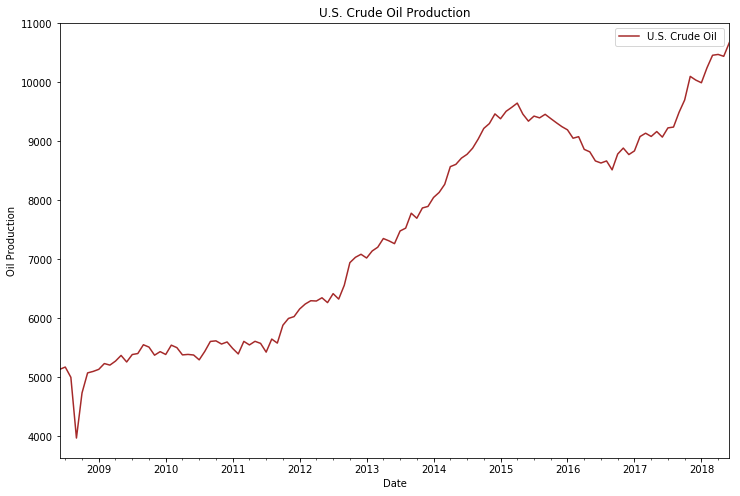

In [28]:
crude_oil_data.plot( x='Date',y='U.S. Crude Oil ',figsize=(12,8),color='brown')

plt.ylabel('Oil Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'U.S. Crude Oil Production')

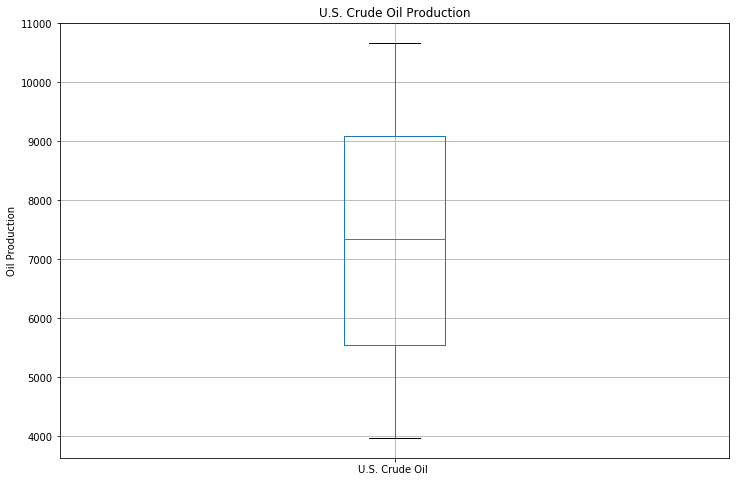

In [30]:
crude_oil_data.boxplot( 'U.S. Crude Oil ',figsize=(12,8))

plt.ylabel('Oil Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'California Crude Oil Production')

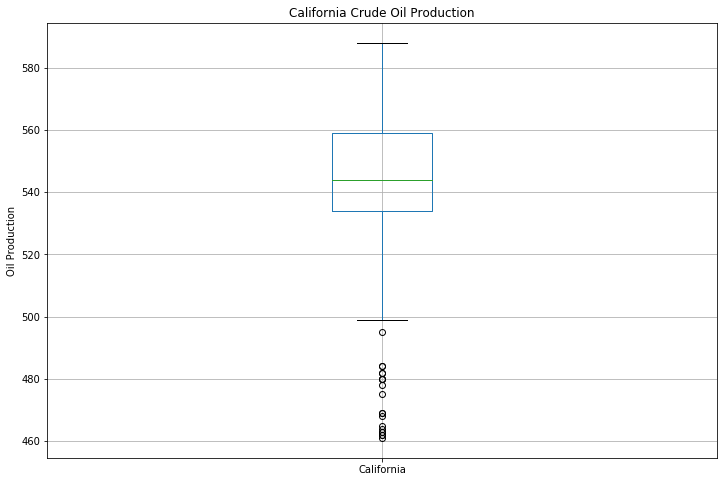

In [35]:
crude_oil_data[['California']].boxplot(figsize=(12,8))

plt.ylabel('Oil Production')
plt.title('California Crude Oil Production')

Text(0.5, 1.0, 'Alaska and California Crude Oil Production')

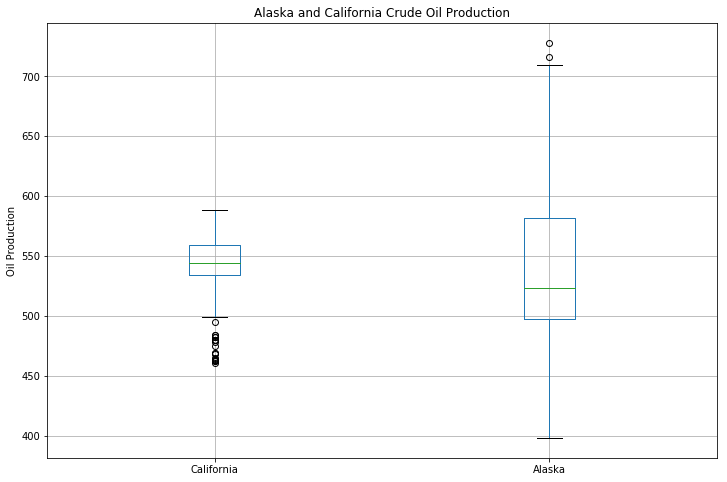

In [63]:
crude_oil_data[['California', 'Alaska']].boxplot(figsize=(12,8))

##'Alaska'

plt.ylabel('Oil Production')
plt.title('Alaska and California Crude Oil Production')

Text(0.5, 1.0, 'U.S. Crude Oil Production')

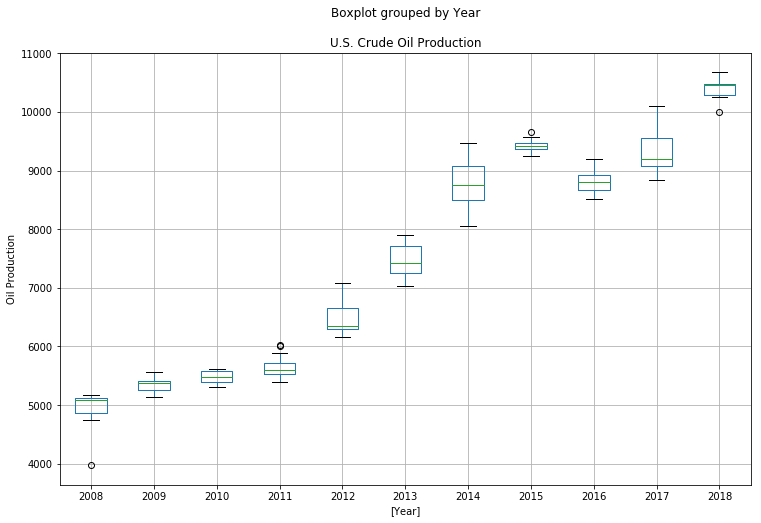

In [37]:
crude_oil_data.boxplot(column=['U.S. Crude Oil '], by=['Year'], figsize=(12,8))

plt.ylabel('Oil Production')
plt.title('U.S. Crude Oil Production')

In [38]:
# grouping by year 

year_data = crude_oil_data.groupby('Year', as_index=False).sum()
year_data[['Year', 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


Text(0.5, 1.0, 'U.S. Crude Oil Production')

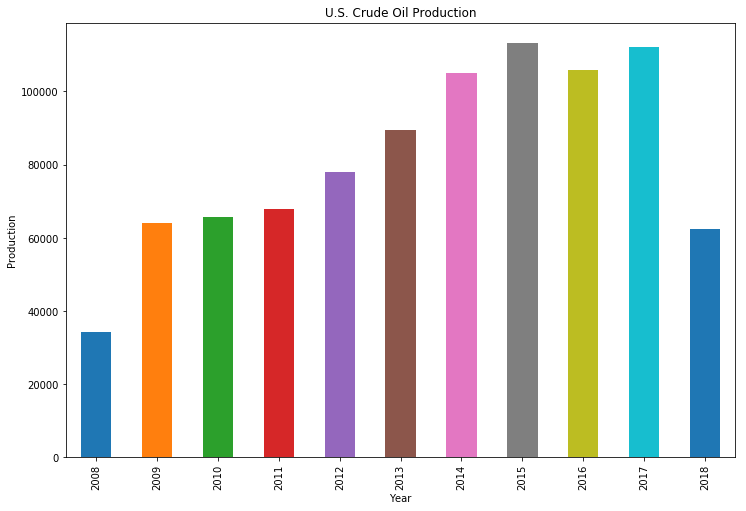

In [39]:
colors =['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

year_data.plot.bar(x='Year',y='U.S. Crude Oil ',figsize=(12,8),color=colors,legend=False)

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

In [52]:
# Finding the avr crude oil production for each us state leaving behind the columns we don't need e.g. US Crude oil, Date..
mean_prod_data = crude_oil_data.mean()[1:-3]

mean_prod_data

Alabama            22.958678
Alaska            540.404959
Arkansas           16.462810
California        536.388430
Colorado          212.115702
Mexico           1444.264463
Pacific            43.115702
Florida             5.190083
Idaho               0.066116
Illinois           25.008264
Indiana             5.619835
Kansas            114.520661
Kentucky            7.041322
Louisiana         177.404959
Michigan           18.016529
Mississippi        62.355372
Missouri            0.223140
Nebraska            6.966942
Montana            71.537190
Nevada              1.000000
New Mexico        305.495868
New York            1.000000
North Dakota      746.380165
Ohio               33.322314
Oklahoma          321.611570
Pennsylvania       13.876033
South Dakota        4.504132
Wyoming           180.429752
West Virginia      16.471074
Utah               85.148760
dtype: float64

In [53]:
mean_prod_data = mean_prod_data.sort_values(ascending=False)
mean_prod_data

Mexico           1444.264463
North Dakota      746.380165
Alaska            540.404959
California        536.388430
Oklahoma          321.611570
New Mexico        305.495868
Colorado          212.115702
Wyoming           180.429752
Louisiana         177.404959
Kansas            114.520661
Utah               85.148760
Montana            71.537190
Mississippi        62.355372
Pacific            43.115702
Ohio               33.322314
Illinois           25.008264
Alabama            22.958678
Michigan           18.016529
West Virginia      16.471074
Arkansas           16.462810
Pennsylvania       13.876033
Kentucky            7.041322
Nebraska            6.966942
Indiana             5.619835
Florida             5.190083
South Dakota        4.504132
Nevada              1.000000
New York            1.000000
Missouri            0.223140
Idaho               0.066116
dtype: float64

In [55]:
mean_prod_data = pd.DataFrame(mean_prod_data).reset_index()

mean_prod_data.columns = ['State','Production']

mean_prod_data.head(10)

,State,Production
0,Mexico,1444.264463
1,North Dakota,746.380165
2,Alaska,540.404959
3,California,536.388430
4,Oklahoma,321.611570
5,New Mexico,305.495868
6,Colorado,212.115702
7,Wyoming,180.429752
8,Louisiana,177.404959
9,Kansas,114.520661


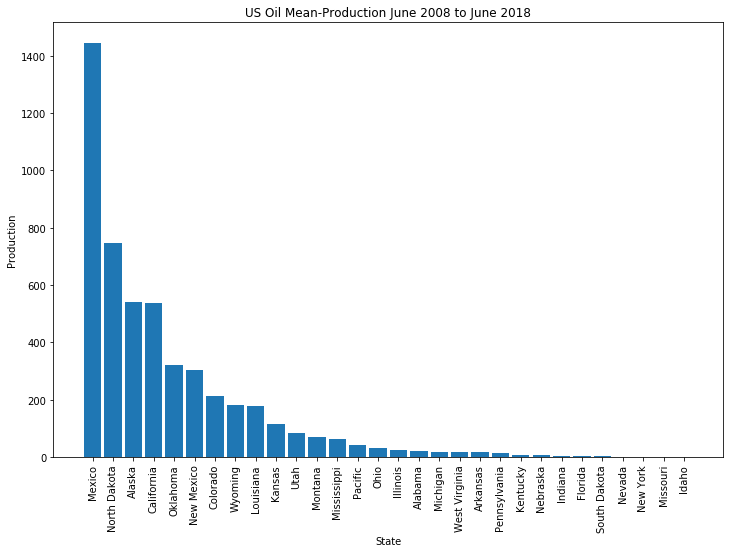

In [58]:
plt.figure(figsize=(12,8))

plt.bar(mean_prod_data['State'], mean_prod_data['Production'],width=0.85)

plt.title('US Oil Mean-Production June 2008 to June 2018')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')

plt.show()

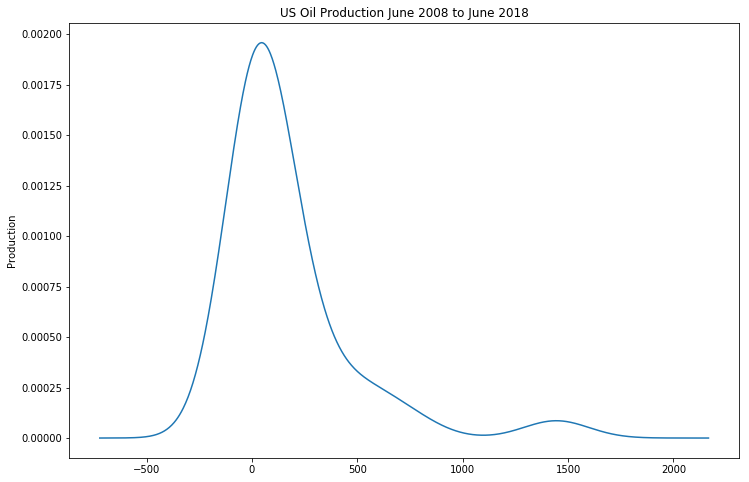

In [61]:
# Visualising the oil production across states in form of a pdf(probability density function)
#                 use the kde (kernel density estimation).
# KDE shows you the probability distribution of oil across all states in the U.S.

mean_prod_data['Production'].plot.kde(figsize=(12,8))

plt.title('US Oil Production June 2008 to June 2018')
plt.ylabel('Production')

plt.show()

## The below shows that the pdf curve for average oil production is in the form of a normal distribution.
# but there are a few positive outliers 
# From the previous visualisation we can see that  

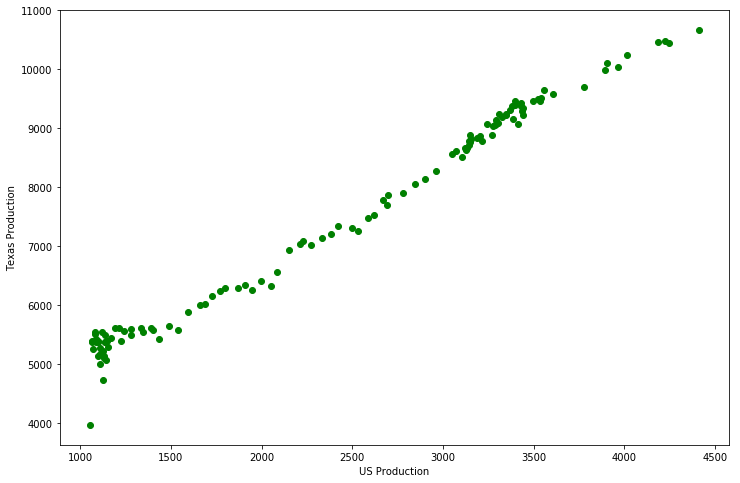

In [67]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Texas Production')

plt.show()

## Clear linear relationship, it shows Texas has a big influence on the US oil production
## If Texas produces more oil, the entire US produces moe oil

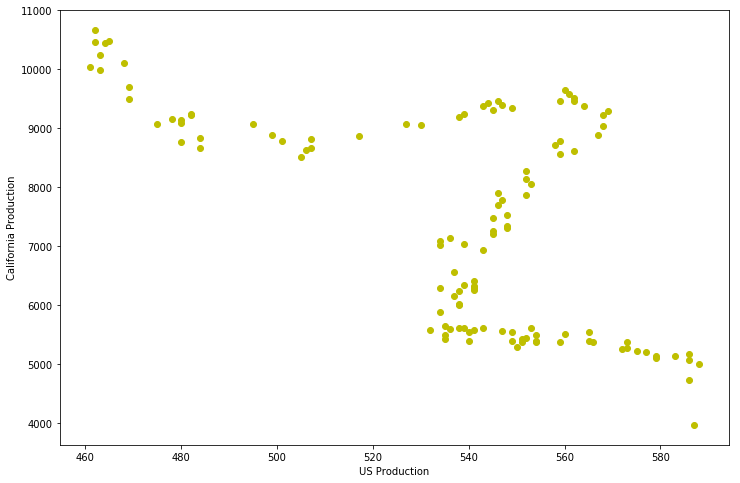

In [70]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['California'], crude_oil_data['U.S. Crude Oil '], c='y')

plt.xlabel('US Production')
plt.ylabel('California Production')

plt.show()

## No linear relationship

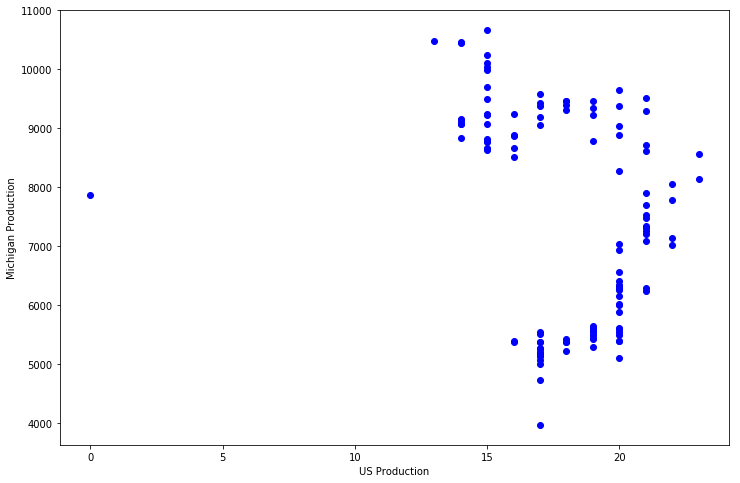

In [75]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['Michigan'], crude_oil_data['U.S. Crude Oil '], c='b')

plt.xlabel('US Production')
plt.ylabel('Michigan Production')

plt.show()